## Data Exploration 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [10]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw
                                                            , postgres_host, postgres_port, postgres_db))
us_education = pd.read_sql_query('select * from useducation', con = engine)
engine.dispose()

Lets explore the intial dataset

In [17]:
us_education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [18]:
us_education.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
1491,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


In [12]:
us_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [122]:
us_education.columns[0:21]

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

The next step should be handling missing values.I saw a timeseries pattern in the data and i used that patten to interpolate the missing values.

In [123]:
new_us_education = pd.DataFrame(data = []
                                , index = ['i'], columns = us_education.columns[0:21])
for state in us_education['STATE'].unique():
    new_us_education = new_us_education.append(us_education[us_education.columns[0:21]][us_education['STATE'] == state].interpolate())

In [124]:
new_us_education = new_us_education.drop(['i'])

In [125]:
new_us_education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,237222.0,204207.0,8264.0,56598.0,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,306977.0,231508.0,9051.0,57723.0,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,326956.0,243365.0,9324.0,59739.0,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0


with interpolation i could not get ride of the whole missing values,so i used fillna with mean to recover the rest of the missing values.

In [127]:
new_us_education.fillna(new_us_education.mean(), inplace = True)

In [128]:
new_us_education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 0 to 1426
Data columns (total 21 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null object
ENROLL                          1492 non-null float64
TOTAL_REVENUE                   1492 non-null float64
FEDERAL_REVENUE                 1492 non-null float64
STATE_REVENUE                   1492 non-null float64
LOCAL_REVENUE                   1492 non-null float64
TOTAL_EXPENDITURE               1492 non-null float64
INSTRUCTION_EXPENDITURE         1492 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1492 non-null float64
OTHER_EXPENDITURE               1492 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1492 non-null float64
GRADES_PK_G                     1492 non-null float64
GRADES_KG_G                     1492 non-null float64
GRADES_4_G                      1492 non-null float64
GRADES_8_G                      1492 

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [101]:
new_us_education.describe()

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03
mean,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,9.086405e+05,17941.337838,63355.545791,64216.228283,63883.304040,54378.534680,5.161999e+05,2.463631e+05,8.016962e+05
std,9.894157e+05,1.133691e+07,1.091669e+06,5.359037e+06,5.297147e+06,1.152961e+07,6.076026e+06,3.230331e+06,5.027899e+05,1.256234e+06,29647.585379,80375.476126,80315.693698,78851.946398,68620.220623,6.427238e+05,3.085426e+05,9.657539e+05
min,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03
25%,2.966035e+05,2.494691e+06,2.113685e+05,1.328511e+06,8.765120e+05,2.470963e+06,1.313649e+06,7.397895e+05,1.288998e+05,2.098070e+05,2129.750000,11502.000000,13429.000000,13105.500000,10752.000000,1.076582e+05,5.021900e+04,1.802948e+05
50%,7.802040e+05,6.101300e+06,4.931545e+05,2.999801e+06,2.526811e+06,6.205520e+06,3.186679e+06,1.842874e+06,3.509000e+05,6.139235e+05,8922.000000,41429.500000,42933.000000,43236.500000,36615.500000,3.433310e+05,1.637990e+05,5.754585e+05
75%,9.450010e+05,9.868324e+06,7.888035e+05,4.480015e+06,4.179907e+06,9.879493e+06,5.224409e+06,2.931684e+06,4.746500e+05,9.284380e+05,21817.500000,73578.000000,75300.000000,76080.500000,67622.750000,6.091405e+05,2.908644e+05,9.126062e+05
max,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06


From the descriptive statistics what i found remarkable is that,the mean and the median are way different,the mean is higher than the median in many of the variables.This is an indication that the distribution of the variables is skewed to the right as a result of outliers.Another remarkable point is that the mean TOTAL_EXPENDITURE is greater than the mean TOTAL_REVENUE,an indication of average loss.

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

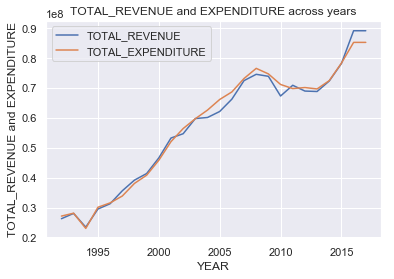

In [114]:
plt.plot(new_us_education[new_us_education['STATE'] == 'CALIFORNIA']['YEAR']
         , new_us_education[new_us_education['STATE'] == 'CALIFORNIA']['TOTAL_REVENUE']);
plt.plot(new_us_education[new_us_education['STATE'] == 'CALIFORNIA']['YEAR']
         , new_us_education[new_us_education['STATE'] == 'CALIFORNIA']['TOTAL_EXPENDITURE']);
plt.title('TOTAL_REVENUE and EXPENDITURE across years')
plt.ylabel('TOTAL_REVENUE and EXPENDITURE')
plt.xlabel('YEAR')
plt.legend();

As we can see from the above plot the pattern of the line is almost the same with little bit of ups and downs.there is down pick for the TOTAL_REVENUE around 2010 and this might be caused due to the economic crises of 2008.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [201]:
means = {}
for avg_variable in us_education.columns[21:]:
    means[avg_variable] = np.mean(us_education[avg_variable])
means    

{'AVG_MATH_4_SCORE': 234.76829289706964,
 'AVG_MATH_8_SCORE': 278.4147114511402,
 'AVG_READING_4_SCORE': 218.86615397416628,
 'AVG_READING_8_SCORE': 263.66113199437666}

we can see from the above calculations that the students are more successful in Math than in reading lessons.

4. What are the distributions of the math and reading scores in the sample?

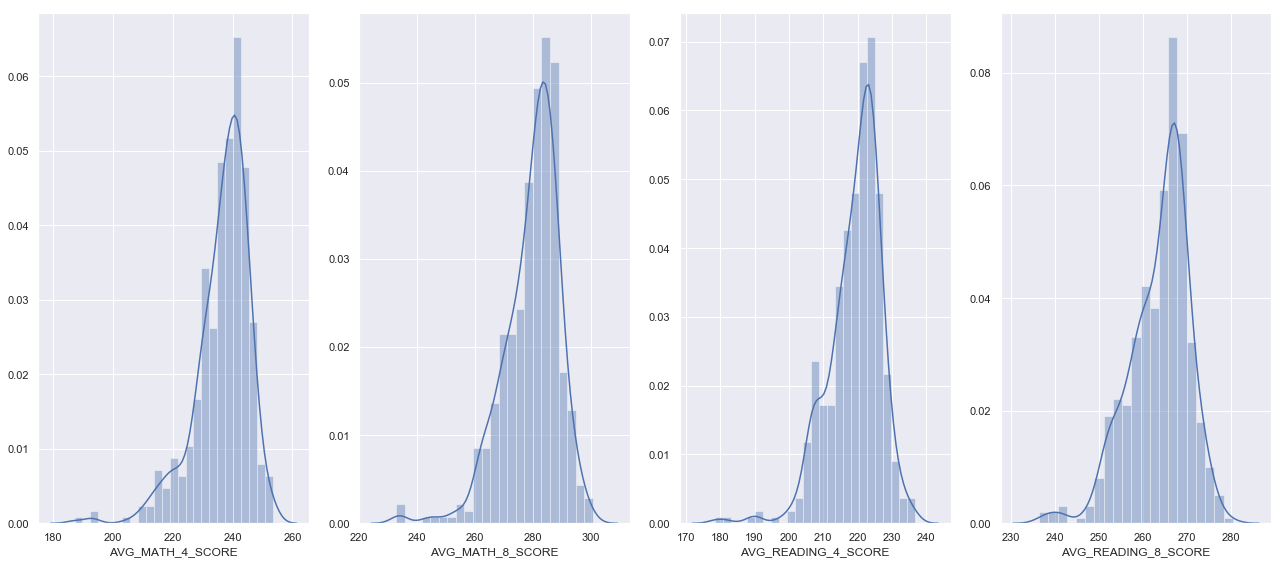

In [233]:
avg_data = us_education[us_education.columns[21:]]
avg_data1 = avg_data.dropna()
plt.figure(figsize = (18,8))
plt.title('The distribution plot of the Average scores in Math and Reading')
for i, avg_variable in zip([1,2,3,4] ,us_education.columns[21:]):
    plt.subplot(1,4,i)
    sns.distplot(avg_data1[avg_variable]) 
    plt.xlabel(avg_variable)
    plt.tight_layout()
      

From the above distribution plots we can learn that with the missing values removed they are normaly distributed.

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

Filling the missing values with mean;

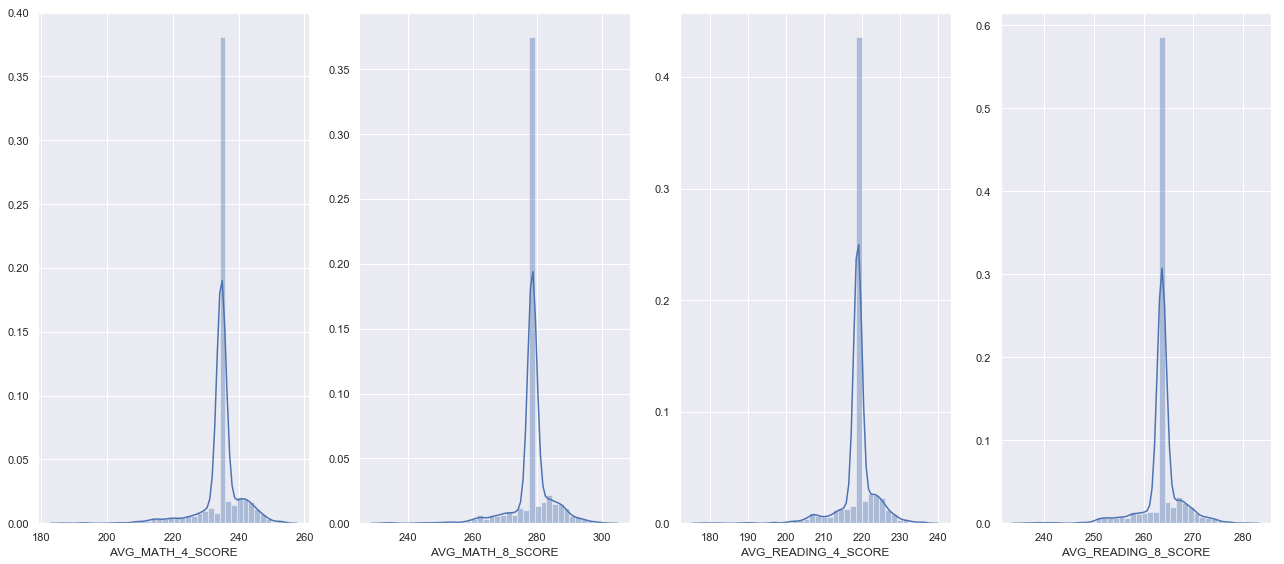

In [234]:
avg_data2 = avg_data.fillna(avg_data.mean())
plt.figure(figsize = (18,8))
plt.title('The distribution plot of the Average scores in Math and Reading')
for i, avg_variable in zip([1,2,3,4] ,us_education.columns[21:]):
    plt.subplot(1,4,i)
    sns.distplot(avg_data2[avg_variable]) 
    plt.xlabel(avg_variable)
    plt.tight_layout()
      

Filling missing value with median;

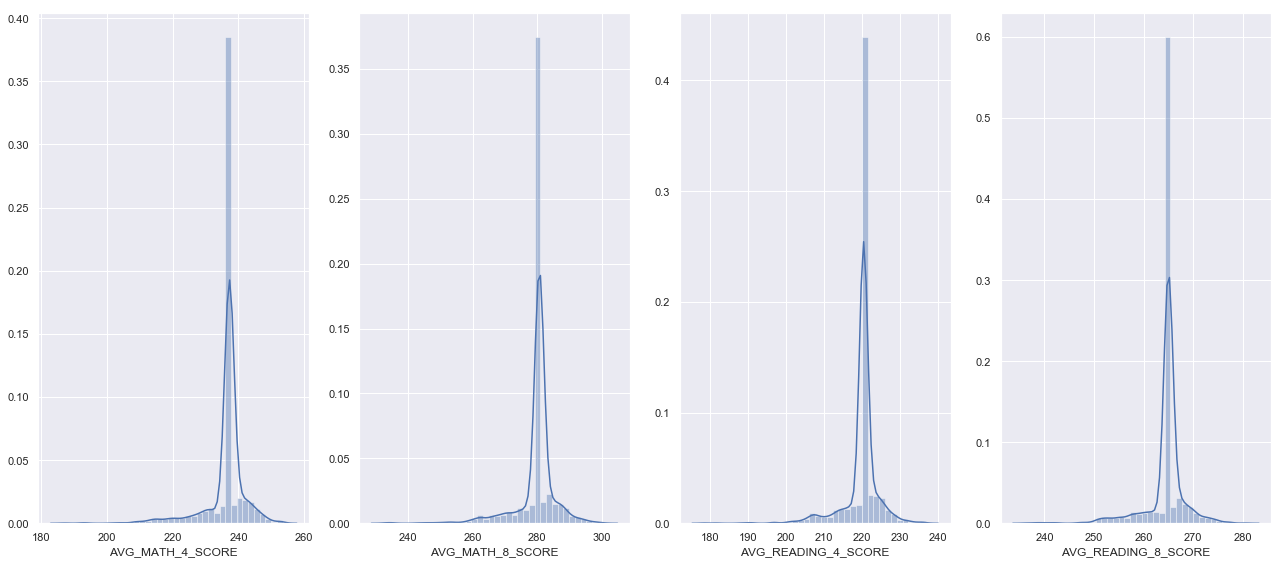

In [235]:
avg_data3 = avg_data.fillna(avg_data.median())
plt.figure(figsize = (18,8))
plt.title('The distribution plot of the Average scores in Math and Reading')
for i, avg_variable in zip([1,2,3,4] ,us_education.columns[21:]):
    plt.subplot(1,4,i)
    sns.distplot(avg_data3[avg_variable]) 
    plt.xlabel(avg_variable)
    plt.tight_layout()

Filling missing value using interpolate function;

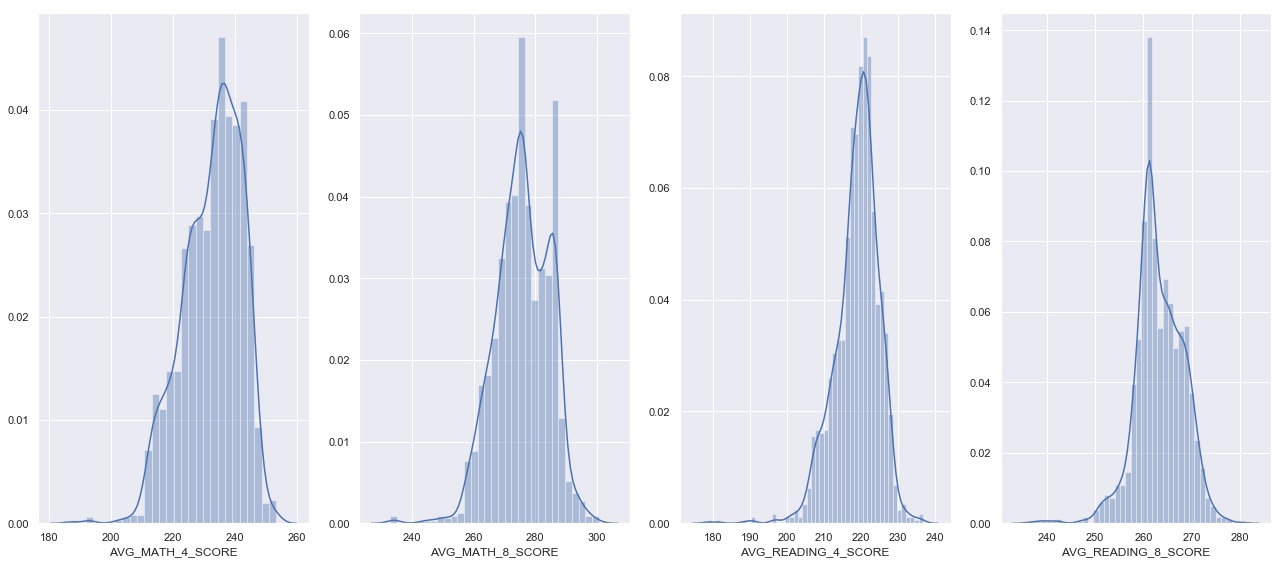

In [238]:
avg_data4 = avg_data.interpolate()
avg_data_4 = avg_data4.dropna()
plt.figure(figsize = (18,8))
plt.title('The distribution plot of the Average scores in Math and Reading')
for i, avg_variable in zip([1,2,3,4] ,us_education.columns[21:]):
    plt.subplot(1,4,i)
    sns.distplot(avg_data_4[avg_variable]) 
    plt.xlabel(avg_variable)
    plt.tight_layout()